# The Sequential model API

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model
#We can assign meaningful names to layers to easily retrieve their parameters, inputs and outputs later on
model = Sequential([
                    Flatten(input_shape = (28,28)),
                    Dense(16, activation='relu', name='layer1'),
                    Dense(16, activation='relu', name='layer2'),
                    Dense(10, activation='softmax'),
                    Softmax()
])


In [4]:
# Print the model summary
print(model.weights)
print(model.summary())

[<tf.Variable 'layer1/kernel:0' shape=(784, 16) dtype=float32, numpy=
array([[ 0.04218367,  0.04144675,  0.08578937, ..., -0.04761295,
        -0.02608018,  0.03202542],
       [-0.06986588,  0.05775483, -0.03162657, ..., -0.04804736,
        -0.05385596, -0.04967815],
       [-0.0197144 ,  0.0153563 , -0.03794613, ...,  0.0261759 ,
        -0.04251587, -0.06326491],
       ...,
       [ 0.08206369, -0.02899649,  0.03501264, ..., -0.04877752,
         0.01794863, -0.01171984],
       [ 0.04633129, -0.01903451,  0.04202887, ..., -0.08353388,
         0.01211671, -0.05323942],
       [ 0.01573733, -0.07756884,  0.03969082, ..., -0.01031813,
         0.072725  , -0.08281022]], dtype=float32)>, <tf.Variable 'layer1/bias:0' shape=(16,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>, <tf.Variable 'layer2/kernel:0' shape=(16, 16) dtype=float32, numpy=
array([[ 0.03932035, -0.13619491,  0.0258905 ,  0.1959872 ,  0.27851412,
 

***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [6]:
# Build the Sequential convolutional neural network model
#Note that the kernel size of the pooling and conv layers can be specified as an integer
#if we want it to be the same dimension both horiz. and vertic.
#This is also the case for the 'strides' argument
model = Sequential([
                    Conv2D(16, kernel_size=3, activation='relu', input_shape=(28,28,1), data_format='channels_last'),
                    Conv2D(16, (3,3), activation='relu'),
                    MaxPooling2D(pool_size=3),
                    Flatten(),
                    Dense(64, activation='relu'),
                    Dense(10, activation='softmax', name='output_layer')
])


In [7]:
# Print the model summary
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                65600     
_________________________________________________________________
output_layer (Dense)         (None, 10)                650       
Total params: 68,730
Trainable params: 68,730
Non-trainable params: 0
__________________________________________________

***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [8]:
# Define the model optimizer, loss function and metrics

optim = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer = optim,
              loss = 'sparse_categorical_crossentropy',
              metrics = [acc, mae])


In [9]:
# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)


sparse_categorical_crossentropy
[]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [10]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [11]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [12]:
# Print the shape of the training data
train_images.shape


(60000, 28, 28)

In [13]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels)

[9 0 0 ... 3 0 5]


In [14]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255.
test_images = test_images / 255.

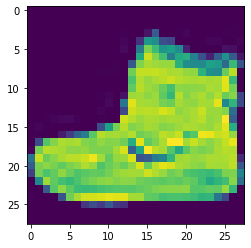

label:  Ankle boot 


In [15]:
# Display one of the images
i = 0
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f'label:  {labels[train_labels[i]]} ')


#### Fit the model

In [16]:
# Fit the model
#Add a new axis because at the moment the images are only 2 dimensional
history = model.fit(train_images[..., np.newaxis], train_labels, epochs=10, batch_size=256, verbose = 2)


Epoch 1/10
235/235 - 8s - loss: 0.4844 - sparse_categorical_accuracy: 0.8262 - mean_absolute_error: 4.4200
Epoch 2/10
235/235 - 1s - loss: 0.3041 - sparse_categorical_accuracy: 0.8896 - mean_absolute_error: 4.4200
Epoch 3/10
235/235 - 1s - loss: 0.2542 - sparse_categorical_accuracy: 0.9082 - mean_absolute_error: 4.4200
Epoch 4/10
235/235 - 1s - loss: 0.2213 - sparse_categorical_accuracy: 0.9186 - mean_absolute_error: 4.4200
Epoch 5/10
235/235 - 1s - loss: 0.2031 - sparse_categorical_accuracy: 0.9251 - mean_absolute_error: 4.4200
Epoch 6/10
235/235 - 1s - loss: 0.1878 - sparse_categorical_accuracy: 0.9310 - mean_absolute_error: 4.4200
Epoch 7/10
235/235 - 1s - loss: 0.1686 - sparse_categorical_accuracy: 0.9360 - mean_absolute_error: 4.4200
Epoch 8/10
235/235 - 1s - loss: 0.1610 - sparse_categorical_accuracy: 0.9391 - mean_absolute_error: 4.4200
Epoch 9/10
235/235 - 1s - loss: 0.1417 - sparse_categorical_accuracy: 0.9465 - mean_absolute_error: 4.4200
Epoch 10/10
235/235 - 1s - loss: 0.13

#### Plot training history

In [17]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.484398,0.826233,4.419999
1,0.304120,0.889567,4.420001
2,0.254215,0.908250,4.420000
3,0.221268,0.918583,4.420000
4,0.203057,0.925117,4.420001


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

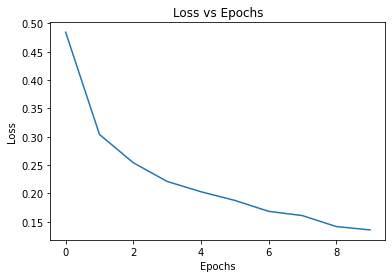

In [18]:
# Make a plot for the loss
loss_plot = df.plot(y="loss", title="Loss vs Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel= "Loss")


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

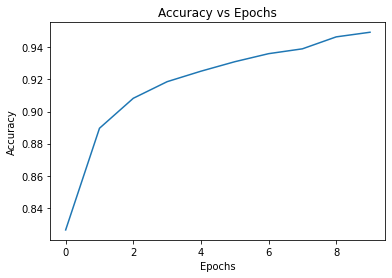

In [19]:
# Make a plot for the accuracy
acc_plot = df.plot(y="sparse_categorical_accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel= "Accuracy")


[Text(0, 0.5, 'MAE'), Text(0.5, 0, 'Epochs')]

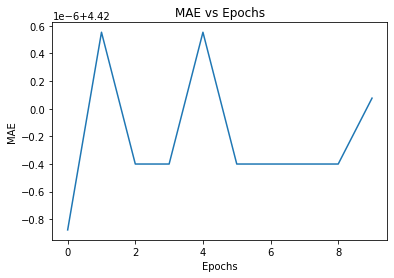

In [20]:
# Make a plot for the additional metric
mae_plot = df.plot(y="mean_absolute_error", title="MAE vs Epochs", legend=False)
mae_plot.set(xlabel="Epochs", ylabel= "MAE")


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [21]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [22]:
# Evaluate the model

test_loss, test_accuracy, test_mae = model.evaluate(test_images[..., np.newaxis], test_labels, verbose = 2)

313/313 - 1s - loss: 0.2563 - sparse_categorical_accuracy: 0.9125 - mean_absolute_error: 4.4200


#### Make predictions from the model

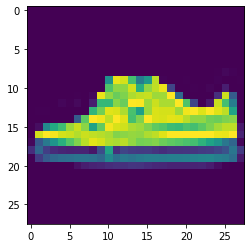

Label: Sneaker
Prediction:  Sneaker


In [35]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
preds = model.predict(test_image[np.newaxis,..., np.newaxis])
print(f"Label: {labels[test_labels[random_inx]]}")
print(f"Prediction:  {labels[np.argmax(preds[0])]}")